In [70]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import requests
import json
import csv
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
# Read de data mannually for portfolio_1= positions_jorge
tickers=['AMZN', 'BA', 'BABA', 'DAC', 'FLGT', 'PYPL']
shares=[1, 14, 10, 20, 141, 16]



AMZN_df = pd.read_csv('../../../data/rawdata/historical/Tickers/AMZN_historical.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
BA_df = pd.read_csv('../../../data/rawdata/historical/Tickers/BA_historical.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
BABA_df = pd.read_csv('../../../data/rawdata/historical/Tickers/BABA_historical.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
DAC_df = pd.read_csv('../../../data/rawdata/historical/Tickers/DAC_historical.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
FLGT_df = pd.read_csv('../../../data/rawdata/historical/Tickers/FLGT_historical.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
PYPL_df = pd.read_csv('../../../data/rawdata/historical/Tickers/PYPL_historical.csv', index_col="date", infer_datetime_format=True, parse_dates=True)


In [39]:
# Combining Single Stocks into portfolio
portfolio_1 = pd.concat([AMZN_df['close'], BA_df['close'], BABA_df['close'], DAC_df['close'], FLGT_df['close'], PYPL_df['close']], axis='columns', join='inner')
portfolio_1.sort_index(inplace = True)
portfolio_1 = portfolio_1.round(2)
portfolio_1

,close,close,close,close,close,close
date,,,,,,
2016-09-29,829.05,131.03,105.55,37.10,9.18,40.39
2016-09-30,837.31,131.74,105.79,37.52,9.22,40.97
2016-10-03,836.74,132.38,105.38,38.50,10.39,40.59
2016-10-04,834.03,132.25,105.45,37.10,9.95,40.78
2016-10-05,844.36,134.66,106.96,37.52,9.57,40.44
...,...,...,...,...,...,...
2021-04-15,3379.09,251.11,239.09,51.92,90.42,274.00
2021-04-16,3399.44,248.18,238.69,53.11,90.50,269.87
2021-04-19,3372.01,244.15,234.78,53.05,85.62,267.91


In [40]:
#Rename comlumns with ticker name
portfolio_1.columns = tickers
portfolio_1

,AMZN,BA,BABA,DAC,FLGT,PYPL
date,,,,,,
2016-09-29,829.05,131.03,105.55,37.10,9.18,40.39
2016-09-30,837.31,131.74,105.79,37.52,9.22,40.97
2016-10-03,836.74,132.38,105.38,38.50,10.39,40.59
2016-10-04,834.03,132.25,105.45,37.10,9.95,40.78
2016-10-05,844.36,134.66,106.96,37.52,9.57,40.44
...,...,...,...,...,...,...
2021-04-15,3379.09,251.11,239.09,51.92,90.42,274.00
2021-04-16,3399.44,248.18,238.69,53.11,90.50,269.87
2021-04-19,3372.01,244.15,234.78,53.05,85.62,267.91


In [41]:

#Reading portfolio_2 (holdings_william)
    
holdings_william_df = pd.read_csv('../../../data/cleandata/holdings_william.csv')
holdings_william_df

# Silce the data for Stocks symbol and Postions held
positions_2= holdings_william_df[['held','symbol']]
positions_2


,held,symbol
0,70,T
1,20,LI
2,10,LNC
3,10,ONTO
4,100,UWMC
5,10,ABBV
6,10,ALL
7,100,GOLD
8,10,BEAM
9,70,BNGO


In [42]:
# Create a List of Stocks and a list of position held for future manipulation

tickers_2 = positions_2['symbol'].to_list()
shares_2  = positions_2['held'].to_list()


In [43]:
#Reading portfolio_3 (holdings_juancalos()
    
holdings_jc_df = pd.read_csv('../../../data/cleandata/holdings_juancarlos.csv')
holdings_jc_df

# Silce the data for Stocks symbol and Postions held
positions_3= holdings_jc_df[['held','symbol']]
positions_3

,held,symbol
0,150,ZM
1,150,MSFT
2,150,SQ
3,150,BABA
4,150,AAPL
5,150,TSLA
6,150,COST
7,150,T
8,150,FB
9,150,DIS


In [44]:
#Write a csv file with portfolio_1 close price
portfolio_1.to_csv('../../../data/cleandata/portfolio_1_JS.csv')

In [45]:
## Conduct Quantitative Analysis (portfolio_1);In this section, we will calculate and visualize performance and risk metrics for the portfolios.

# 1.1 Calculate Daily Returns of portfolio

portfolio_1_daily_ret = portfolio_1.pct_change()
portfolio_1_daily_ret = portfolio_1_daily_ret.dropna()
portfolio_1_daily_ret

,AMZN,BA,BABA,DAC,FLGT,PYPL
date,,,,,,
2016-09-30,0.009963,0.005419,0.002274,0.011321,0.004357,0.014360
2016-10-03,-0.000681,0.004858,-0.003876,0.026119,0.126898,-0.009275
2016-10-04,-0.003239,-0.000982,0.000664,-0.036364,-0.042348,0.004681
2016-10-05,0.012386,0.018223,0.014320,0.011321,-0.038191,-0.008337
2016-10-06,-0.003198,-0.001782,0.001122,-0.003731,0.007315,-0.006429
...,...,...,...,...,...,...
2021-04-15,0.013828,-0.005229,-0.000585,-0.023877,0.016526,0.025411
2021-04-16,0.006022,-0.011668,-0.001673,0.022920,0.000885,-0.015073
2021-04-19,-0.008069,-0.016238,-0.016381,-0.001130,-0.053923,-0.007263


<AxesSubplot:title={'center':'Daily Returns For portfolio_1'}, xlabel='date'>

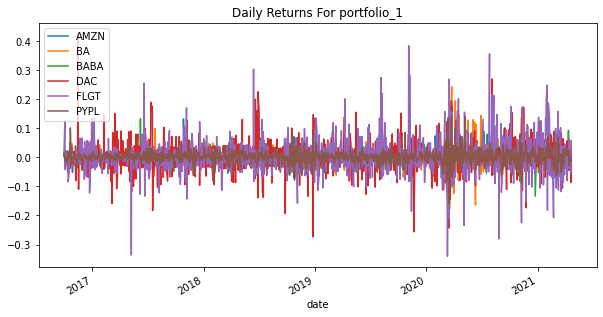

In [46]:
# 1.2 Plot daily Returns for portfolio_1
portfolio_1_daily_ret.plot(figsize = (10, 5), title = 'Daily Returns For portfolio_1' )

In [47]:
 # 2.1. Calculate cumulative Returns

portfolio_1_cum_ret =  (1 + portfolio_1_daily_ret).cumprod() - 1
portfolio_1_cum_ret
   

,AMZN,BA,BABA,DAC,FLGT,PYPL
date,,,,,,
2016-09-30,0.009963,0.005419,0.002274,0.011321,0.004357,0.014360
2016-10-03,0.009276,0.010303,-0.001611,0.037736,0.131808,0.004952
2016-10-04,0.006007,0.009311,-0.000947,0.000000,0.083878,0.009656
2016-10-05,0.018467,0.027704,0.013359,0.011321,0.042484,0.001238
2016-10-06,0.015210,0.025872,0.014495,0.007547,0.050109,-0.005199
...,...,...,...,...,...,...
2021-04-15,3.075858,0.916431,1.265182,0.399461,8.849673,5.783857
2021-04-16,3.100404,0.894070,1.261393,0.431536,8.858388,5.681604
2021-04-19,3.067318,0.863314,1.224349,0.429919,8.326797,5.633077


<AxesSubplot:title={'center':'Cumulative Returns For portfolio_1'}, xlabel='date'>

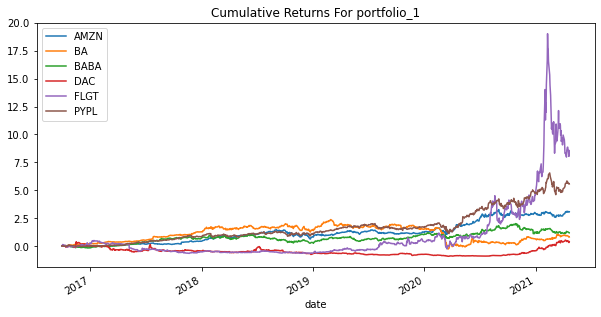

In [48]:
# 2.2 Plot comulative Returns for POrtfolio_1
portfolio_1_cum_ret.plot(figsize = (10, 5), title = 'Cumulative Returns For portfolio_1' )

<AxesSubplot:title={'center':'Portfolio_1 Box Plot'}>

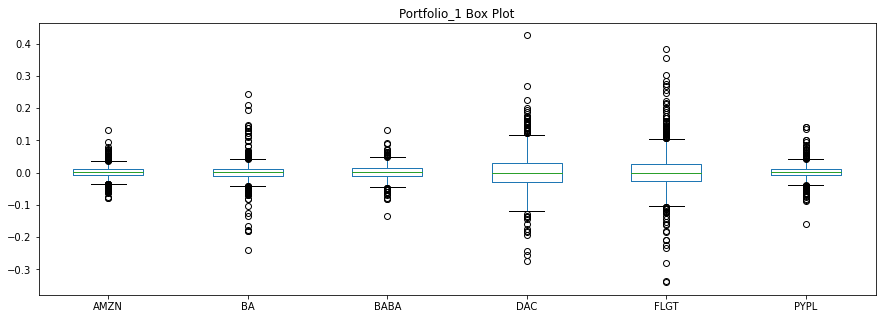

In [49]:
## 3.Risk Analysis 

# 3.1 Create a box plot of portfolio_1

portfolio_1_daily_ret.plot.box(figsize=(15,5), title = 'Portfolio_1 Box Plot')

In [50]:
# 3.2 Retrieve Benchmark (S&P 500) Historical data. 
SPY_df= pd.read_csv('../../../data/rawdata/historical/Tickers/SPY_historical.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
SPY_df.index =SPY_df.index.normalize()

SPY_df['close'] 
#SPY_df['close'] = SPY_df['close'].str.replace(',','.')
#SPY_df['close'] = SPY_df['close'].astype('float')
#SPY_df = SPY_df.rename(columns={'close':"SPY"})
                                            ### WE should revise the Dateframe for both portfolio and Benchamark.
#SPY_df

date
2021-04-20    412.170000
2021-04-19    415.210000
2021-04-16    417.260000
2021-04-15    415.870000
2021-04-14    411.450012
                 ...    
2016-04-27    209.350006
2016-04-26    208.919998
2016-04-25    208.610001
2016-04-22    208.970001
2016-04-21    208.970001
Name: close, Length: 1257, dtype: float64

In [51]:
#Write a csv file with 'SPY' close price
SPY_df['close'].to_csv('../../../data/cleandata/SPY_historical.csv')

In [52]:
# 3.3 Calculate SPY cumulative Returns
SPY_daily_ret = SPY_df['close'].pct_change()
SPY_daily_ret.dropna()

date
2021-04-19    0.007376
2021-04-16    0.004937
2021-04-15   -0.003331
2021-04-14   -0.010628
2021-04-13    0.003427
                ...   
2016-04-27    0.009159
2016-04-26   -0.002054
2016-04-25   -0.001484
2016-04-22    0.001726
2016-04-21    0.000000
Name: close, Length: 1256, dtype: float64

In [53]:
# 3.4 Calculate SPY cumulative Returns

SPY_cum_ret =  (1 + SPY_daily_ret).cumprod() - 1
SPY_cum_ret.dropna()

date
2021-04-19    0.007376
2021-04-16    0.012349
2021-04-15    0.008977
2021-04-14   -0.001747
2021-04-13    0.001674
                ...   
2016-04-27   -0.492078
2016-04-26   -0.493122
2016-04-25   -0.493874
2016-04-22   -0.493000
2016-04-21   -0.493000
Name: close, Length: 1256, dtype: float64

<AxesSubplot:title={'center':'Daily Returns For SPY'}, xlabel='date'>

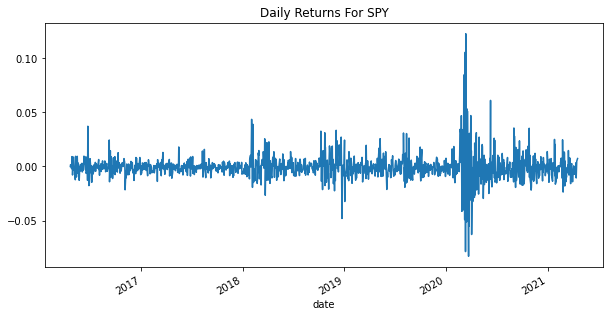

In [54]:

# 3.5 Plot daily Returns for SPY
SPY_daily_ret.plot(figsize = (10, 5), title = 'Daily Returns For SPY' )

In [55]:
# 3.6 Caluculate portfolios Standard deviations

portfolio_1_std = portfolio_1_daily_ret.std()
portfolio_1_std.sort_values(ascending=False)

FLGT    0.060272
DAC     0.054463
BA      0.030127
PYPL    0.022531
BABA    0.021424
AMZN    0.018894
dtype: float64

In [56]:
# 3.7 Claculate SPY Standard Deviation
SPY_std= SPY_daily_ret.std()
SPY_std

0.01201887655500325

In [57]:
# 3.8 Calculate Volatitlity: anualized Portfolio Standard Deviation 


volatility_1= portfolio_1_daily_ret.std()*np.sqrt(252)
volatility_1 = volatility.sort_values(ascending = False)
volatility_1


NameError: name 'volatility' is not defined

In [58]:
# 3.9 Calculate Benchmark Volatiliy

volatility_SPY = SPY_daily_ret.std()*np.sqrt(252)
volatility_SPY = volatility_SPY.sort_values(ascending = False)
volatility_SPY

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [59]:
# 3.10 Rolling Statistics



In [60]:
## 4. TREND TRADING:
#Trend trading is a strategy that employ the use of  technical indicators to identify the direction of market momentum
#It is based on the idea that markets have an element of predictability, so by analysing historical trends and price movements, 
#a trader will be able to forecast what could happen in the future.
#We will we using the 4 most common technical indicators for every stocks,


# We will conduct an Analysis for Apple ("AAPL")

#!pip install pandas data_reader  
#import pandas_datareader as pdr  
#import datetime as dt

# We fetch the data from the Stock using the Function; Pandas Data_reader>get_data_yahoo. 

import pandas_datareader as pdr
import datetime as dt



ticker = 'AAPL'
start = dt.datetime(2020, 1, 2)
end = dt.datetime.now()

ticker_df = pdr.get_data_yahoo(ticker, start)
ticker_df



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385
...,...,...,...,...,...,...
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,133.110001


In [61]:
# 4.1 Moving avergage: Its a tool that smoths out price data by creating a constantly updated average price creating a single
#flat line that effectivly eliminates any variation due price fluctuations. For this study we will be using the 50-day moving
#average (50SMA). This indicator can be used as a buy signal when the price crosses above, and as a sell signal when the price 
#crosses below the line. However, moving averages don't make predictions about the future value of a stock; they simply reveal 
#what the price is doing, on average, over a period of time. Moving averages can also provide support or resistance to the 
#price.


In [62]:
ticker_df['Daily_returns'] =ticker_df['Close'].pct_change()
ticker_df

,High,Low,Open,Close,Volume,Adj Close,Daily_returns
Date,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-0.009722
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,0.007968
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-0.004703
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,0.016086
...,...,...,...,...,...,...,...
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,-0.002528
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996,0.005069
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,133.110001,-0.012830


In [64]:
ticker_df['Log_returns'] = np.log(ticker_df['Close']/ticker_df['Close'].shift())
ticker_df

,High,Low,Open,Close,Volume,Adj Close,Daily_returns,Log_returns
Date,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-0.009722,-0.009770
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,0.007968,0.007937
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-0.004703,-0.004714
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,0.016086,0.015958
...,...,...,...,...,...,...,...,...
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,-0.002528,-0.002531
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996,0.005069,0.005056
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,133.110001,-0.012830,-0.012913


In [65]:
ticker_df['Log_returns'].std()

0.02750771823998492

In [66]:
ticker_volatility = ticker_df['Log_returns'].std()*np.sqrt(252)
ticker_volatility

0.4366714895870128

In [68]:
str_vol = str(round(ticker_volatility,4)*100)
str_vol

'43.669999999999995'

Text(0.5, 1.0, 'AAPL volatility: 43.669999999999995%')

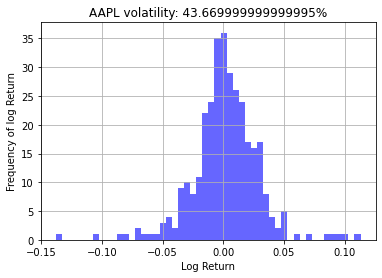

In [71]:
fig, ax = plt.subplots()
ticker_df['Log_returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of log Return")
ax.set_title(F"{ticker} volatility: "+ str_vol + "%")

In [ ]:
# 4.2 Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between 
#two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA)
#from the 12-period EMA.


In [78]:
#Calculate the 50-day Moving Average ticker_df['MA50'] =
ticker_df['MA50'] = ticker_df['Close'].rolling(50).mean() 
ticker_df

,High,Low,Open,Close,Volume,Adj Close,Daily_returns,Log_returns,MA50
Date,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,NaN,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-0.009722,-0.009770,NaN
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,0.007968,0.007937,NaN
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-0.004703,-0.004714,NaN
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,0.016086,0.015958,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,-0.002528,-0.002531,126.6360
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996,0.005069,0.005056,126.5850
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,133.110001,-0.012830,-0.012913,126.5120


In [79]:
# Calculate the 50-day Exponential Moving average
ticker_df['EMA50'] = ticker_df['Close'].ewm(span=50, adjust=False).mean()
ticker_df

,High,Low,Open,Close,Volume,Adj Close,Daily_returns,Log_returns,MA50,EMA50
Date,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,NaN,NaN,NaN,75.087502
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-0.009722,-0.009770,NaN,75.058874
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,0.007968,0.007937,NaN,75.054604
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-0.004703,-0.004714,NaN,75.036679
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,0.016086,0.015958,NaN,75.066515
...,...,...,...,...,...,...,...,...,...,...
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,-0.002528,-0.002531,126.6360,126.969574
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996,0.005069,0.005056,126.5850,127.278218
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,133.110001,-0.012830,-0.012913,126.5120,127.506915


<AxesSubplot:xlabel='Date'>

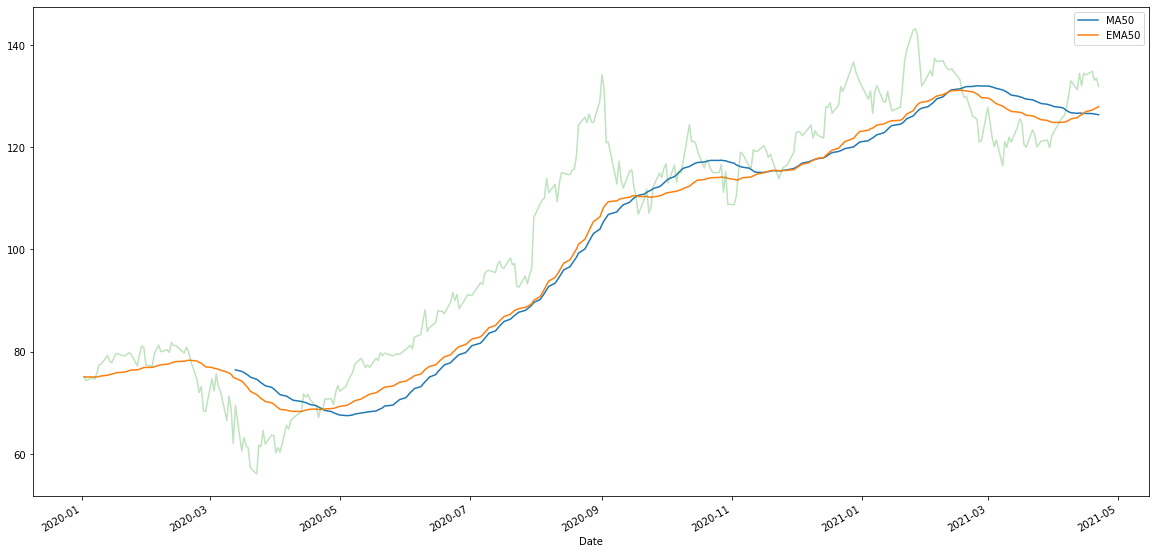

In [83]:
fig, ax =plt.subplots(figsize=(20,10))
ticker_df[['MA50','EMA50']].plot(ax=ax)
ticker_df['Close'].plot(ax=ax, alpha=0.3,)

In [84]:
# As the description says, we need the Exponential Moving Averages (EMA) for a 12-days and 26-days window.
ticker_exp1 = ticker_df['Adj Close'].ewm(span=12, adjust=False).mean()
ticker_exp2 = ticker_df['Adj Close'].ewm(span=26, adjust=False).mean()
ticker_macd = ticker_exp1-ticker_exp2
ticker_macd

Date
2020-01-02    0.000000
2020-01-03   -0.057649
2020-01-06   -0.055368
2020-01-07   -0.080786
2020-01-08   -0.005016
                ...   
2021-04-16    2.595429
2021-04-19    2.769792
2021-04-20    2.736831
2021-04-21    2.710929
2021-04-22    2.535297
Name: Adj Close, Length: 329, dtype: float64

In [85]:
#A nine-day EMA of the MACD called the “signal line,” is then plotted on top of the MACD line, which can function as a trigger for buy
#and sell signals.

ticker_exp3 = ticker_macd.ewm(span=9, adjust=False).mean()
ticker_exp3

Date
2020-01-02    0.000000
2020-01-03   -0.011530
2020-01-06   -0.020297
2020-01-07   -0.032395
2020-01-08   -0.026919
                ...   
2021-04-16    1.348687
2021-04-19    1.632908
2021-04-20    1.853692
2021-04-21    2.025140
2021-04-22    2.127171
Name: Adj Close, Length: 329, dtype: float64

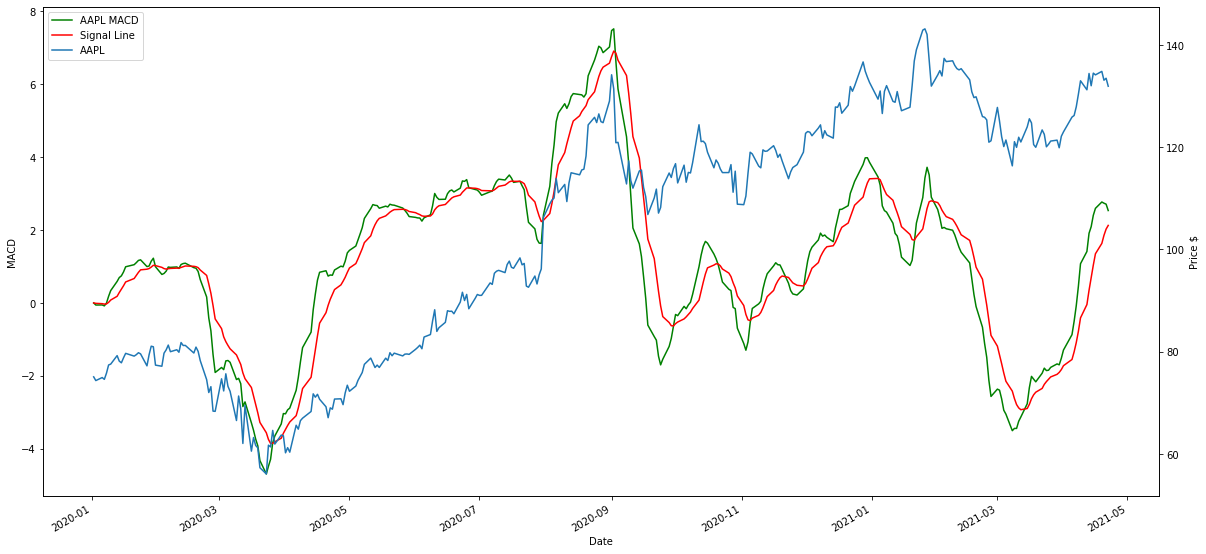

In [97]:
# We import the Matplotlib Pyplot

import matplotlib.pyplot as plt

ticker_macd.plot(label='AAPL MACD', color='g', figsize=(20,10))
ax = ticker_exp3.plot(label='Signal Line', color='r')
ticker_df['Close'].plot(ax=ax, secondary_y=True, label='AAPL')
ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')

In [ ]:
# 4.3 RSI The relative strength index 
#A momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or
#oversold conditions in the price of a stock or other asset.

In [93]:
ticker_df

,High,Low,Open,Close,Volume,Adj Close,Daily_returns,Log_returns,MA50,EMA50,delta,up,down
Date,,,,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,NaN,NaN,NaN,75.087502,NaN,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-0.009722,-0.009770,NaN,75.058874,-0.730003,0.000000,0.730003
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,0.007968,0.007937,NaN,75.054604,0.592499,0.592499,-0.000000
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-0.004703,-0.004714,NaN,75.036679,-0.352493,0.000000,0.352493
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,0.016086,0.015958,NaN,75.066515,1.199997,1.199997,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,-0.002528,-0.002531,126.6360,126.969574,-0.339996,0.000000,0.339996
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996,0.005069,0.005056,126.5850,127.278218,0.679993,0.679993,-0.000000
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,133.110001,-0.012830,-0.012913,126.5120,127.506915,-1.729996,0.000000,1.729996


In [95]:

delta = ticker_df['Close'].diff()     
ticker_df

up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)

ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()

rs = ema_up/ema_down
ticker_df['RSI'] = 100 - (100/(1 + rs))                          
ticker_df

,High,Low,Open,Close,Volume,Adj Close,Daily_returns,Log_returns,MA50,EMA50,delta,up,down,RSI
Date,,,,,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,NaN,NaN,NaN,75.087502,NaN,NaN,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-0.009722,-0.009770,NaN,75.058874,-0.730003,0.000000,0.730003,0.000000
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,0.007968,0.007937,NaN,75.054604,0.592499,0.592499,-0.000000,5.876482
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-0.004703,-0.004714,NaN,75.036679,-0.352493,0.000000,0.352493,5.663260
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,0.016086,0.015958,NaN,75.066515,1.199997,1.199997,-0.000000,16.738942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,-0.002528,-0.002531,126.6360,126.969574,-0.339996,0.000000,0.339996,63.439891
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996,0.005069,0.005056,126.5850,127.278218,0.679993,0.679993,-0.000000,64.427989
2021-04-20,135.529999,131.809998,135.020004,133.110001,94660400.0,133.110001,-0.012830,-0.012913,126.5120,127.506915,-1.729996,0.000000,1.729996,59.986090


In [ ]:
#resuources:
#https://www.investopedia.com/terms/r/rsi.asp
#https://www.youtube.com/watch?v=2H2Gd7zYVA8&t=22s 

In [ ]:
# X.4 OBV Volume itself is a valuable indicator, and on-balance volume (OBV) takes a significant amount of volume information 
#and compiles it into a single one-line indicator. The indicator measures cumulative buying and selling pressure by adding the 
#volume on "up" days and subtracting volume on "down" days. Ideally, the volume should confirm trends. A rising price should b
#accompanied by a rising OBV; a falling price should be accompanied by a falling OBV.


#Calculate the On Balance Volume (OBV)
OBV=[]
OBV.append(0)

#Loop  through the data set("Adj Close") from second row (index 1) to the ende of the data set

for i in range(1, len(ticker.Close)): 
    if ticker.Close[i] > ticker.Close[i-1]:
        OBV.append(OBV[-1] + ticker.Volume[i])
    
    elif ticker.Close[i] < ticker.Close[i-1]:
        OBV.append(OBV[-1] - ticker.Volume[i])
    else:
        OBV.append(OBV[-1])


ticker['OVB'] = OBV
ticker['OBV_EMA'] = ticekr['OBV'].ewm(span=20).mean()
ticker


'''

plt.style.use('fivethirtyeight')






def calculateOnBalanceVolume(df):
    df['obv'] = 0

    index = 1
    while index <= len(df) - 1:
        if(df.iloc[index]['close'] > df.iloc[index-1]['close']):
            df.at[index, 'obv'] += df.at[index-1, 'obv'] + df.at[index, 'volume']

        if(df.iloc[index]['close'] < df.iloc[index-1]['close']):           
            df.at[index, 'obv'] += df.at[index-1, 'obv'] - df.at[index, 'volume']

        index = index + 1

    return df
'''


# Resources:
#https://www.investopedia.com/ask/answers/121714/what-onbalance-volume-obv-formula-and-how-it-calculated.asp
#https://www.youtube.com/watch?v=MRGXd8eaWB4
